Starting Portfolio Value: 10000.0
Sharpe Ratio: OrderedDict([('sharperatio', -1.434073717301426)])
Final Portfolio Value: 10231.679999999993


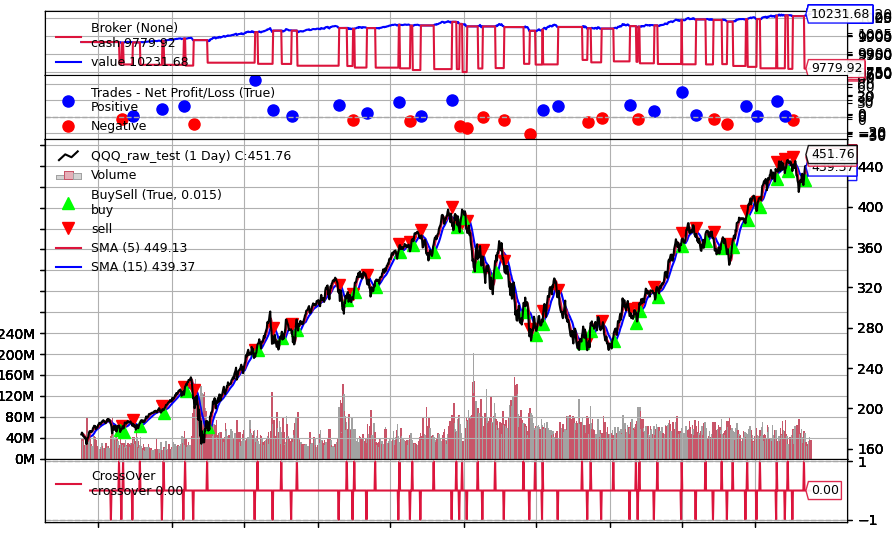

[[<Figure size 2230x1375 with 25 Axes>]]

In [14]:
%matplotlib inline # needed for plotting in jupyter notebook

from datetime import datetime
import backtrader as bt
import backtrader.analyzers as btanalyzers

class SmaCross(bt.SignalStrategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=5, 
        pslow=15  
    )

    def __init__(self):
        # define the indicators/signals in the init function
        sma1 = bt.ind.SMA(period=self.p.pfast)  
        sma2 = bt.ind.SMA(period=self.p.pslow)  
        crossover = bt.ind.CrossOver(sma1, sma2)  
        self.signal_add(bt.SIGNAL_LONG, crossover)  


# ---------------------
# create a backtesting instance
cerebro = bt.Cerebro()  

# import data
data = bt.feeds.YahooFinanceCSVData (dataname='/home/kyle/QQQ_raw_test.csv')

# set up analyzers
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')

# import strategy
cerebro.addstrategy(SmaCross) 

cerebro.adddata(data) 
# ---------------------

print(f'Starting Portfolio Value: {cerebro.broker.getvalue()}')
results = cerebro.run()
# ---------------------
# output analyzers and other stats
print('Sharpe Ratio:', results[0].analyzers.mysharpe.get_analysis())
print(f'Final Portfolio Value: {cerebro.broker.getvalue()}')

%matplotlib widget # needed for plotting in jupyter notebook
cerebro.plot(iplot=False)  